# Clustering with Derived Variables

First let's load the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Filter_Unmerged.csv').drop(columns = ['Unnamed: 0'])
df.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,...,3PM,FGM,FGA,PTS,MINS,AST,REB,BLK,TOV,STL
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,...,41.021,56.021,157,164.3,589.0,18.6,46.5,5.89,13.95,17.05
1,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,...,25.012,38.008,110,108.8,428.4,64.6,61.2,5.10,27.88,12.92
2,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,...,0.000,480.972,809,1112.0,2672.0,128.0,760.0,76.80,138.40,119.20
3,Bam Adebayo,Mia,C,21.73,82,23.3,48.6,15.8,17.1,226,...,3.000,279.948,486,729.8,1910.6,180.4,598.6,64.78,121.36,72.16
4,Deng Adel,Cle,F,22.19,19,10.2,21.3,9.9,13.7,4,...,6.003,11.008,36,32.3,193.8,5.7,19.0,3.99,6.08,0.95


### Feature Engineering

Let's create some new columns that will be more usful in calssifying players acccording to their styles.

In [2]:
for col in ['PTS', 'AST', 'REB', 'BLK', 'TOV', 'STL']:
    df[col + 'P36'] = df[col] * 36 / df['MINS']
df['O/DRTG'] = df['ORTG'] / df['DRTG']
df['3/2FGA'] = df['3PA'] / df['2PA']
df['%FTA'] = df['FTA'] / (df['FGA'] + df['FTA'])
print(list(df.columns))

['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG', '2PM', '3PM', 'FGM', 'FGA', 'PTS', 'MINS', 'AST', 'REB', 'BLK', 'TOV', 'STL', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36', 'O/DRTG', '3/2FGA', '%FTA']


### Feature Selection

Here, we create a list of the columns we want to use as parameters to the clustering alrogithm, called `cols_to_keep`. We ensure that none of these columns contain missing values.

In [3]:
cols_to_keep = ['USG%', 'Tor%', 'eFG%', 'TS%', 'TRB%', 'AST%', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36', 'O/DRTG', '3/2FGA', '%FTA']
cluster_df = df[cols_to_keep]
df[cols_to_keep].isnull().sum().sum()

0

### Clustering

Let us try models with the number of clusters ranging from 5 to 15.

In [4]:
from sklearn.cluster import KMeans
inertias = []
num_data = cluster_df._get_numeric_data().dropna(axis = 1)
for i in range(5, 15):
    test_model = KMeans(n_clusters = i, random_state = 1) #test using just 5 clusters
    test_model.fit(num_data)
    inertias.append(test_model.inertia_)
inertias

[26327.90384997781,
 23297.102645217725,
 21404.192682717563,
 19790.608499696085,
 18476.538694204064,
 17482.05659306451,
 16576.83734228199,
 15674.366084773348,
 15023.966074424798,
 14338.444968908321]

We create a plot of the "intertias" per number of clusteras and use the elbow method to determine the best number of clusters.

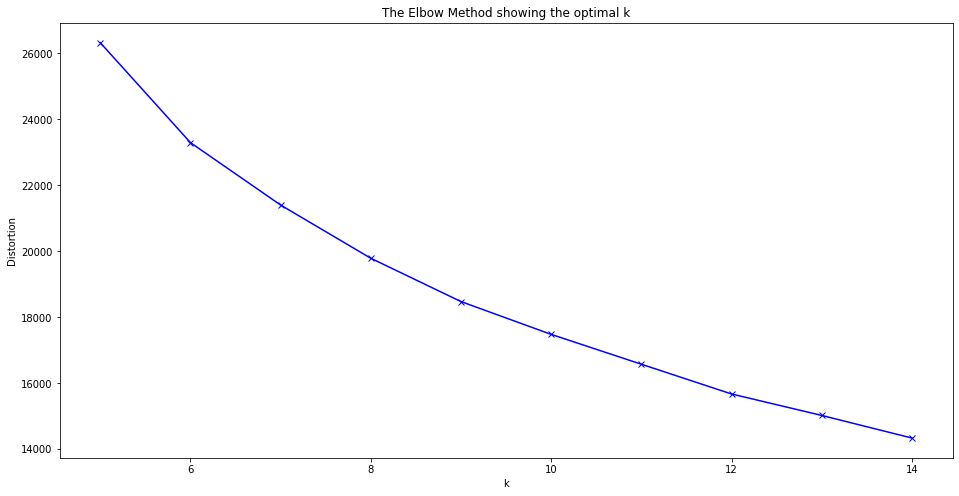

In [5]:
plt.figure(figsize=(16,8))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Analysis

We can now look at the relative size of each cluster.

In [6]:
test_model = KMeans(n_clusters = 9, random_state = 1)
test_model.fit(num_data)
df['Cluster'] = test_model.labels_
df['Cluster'].value_counts()

7    107
3     88
4     56
0     56
1     36
8     31
2     29
5     22
6     15
Name: Cluster, dtype: int64

We can also look at the distribution by position within each cluster.

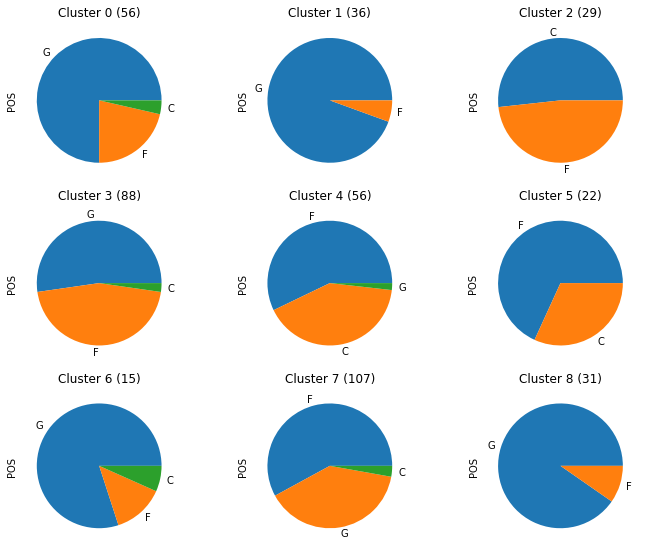

In [7]:
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title("Cluster " + str(i) + " (" + str(len(df[df['Cluster'] == i])) + ")")
    plt.tight_layout()
    df[df['Cluster'] == i]['POS'].value_counts().plot.pie()  
plt.show()

Finally, we can look at the distribution of specific statistics within each cluster and contrast.

In [ ]:
stat = 'PTS'
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(stat + "- Cluster " + str(i) + " (" + str(len(df[df['Cluster'] == i])) + ")")
    plt.xlim(0, 3000)
    plt.tight_layout()
    df[df['Cluster'] == i][stat].hist()
plt.show()